# Data analysis using pandas
After extracting data from the dataset and transform it into dataframe, more analysis can be done using pandas. In this notebook, we will explore some of the basic data analysis that can be done using pandas.

## Part 1: Load the data

In [1]:
import pandas as pd

In [2]:
file_path = 'D:/Projects/fiji-training-2024/data/sample_t2m_fiji.csv'

In [3]:
df = pd.read_csv(file_path, sep=',', parse_dates=['time'], index_col='time')
df

,latitude,longitude,t2m
time,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529
2023-06-01 01:00:00,-17.8,177.4167,301.570176
2023-06-01 02:00:00,-17.8,177.4167,301.615832
2023-06-01 03:00:00,-17.8,177.4167,301.472180
2023-06-01 04:00:00,-17.8,177.4167,300.758050
...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356
2023-06-30 20:00:00,-17.8,177.4167,293.933152
2023-06-30 21:00:00,-17.8,177.4167,295.545141


Let's convert the temperature to Celsius and add it to a new column. We will also round the value to 2 decimal places.

In [4]:
#convert the temperature to Celsius and add it to a new column
df['t2m_C'] = df['t2m'] - 273.15
# round the value to 2 decimal places
df['t2m_C'] = df['t2m_C'].round(1)
df

,latitude,longitude,t2m,t2m_C
time,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.3
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.4
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.5
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.3
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.6
...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356,19.2
2023-06-30 20:00:00,-17.8,177.4167,293.933152,20.8
2023-06-30 21:00:00,-17.8,177.4167,295.545141,22.4


Pandas also provide built-in plotting function that can be used to plot the data. Let's plot the temperature data.

<Axes: xlabel='time'>

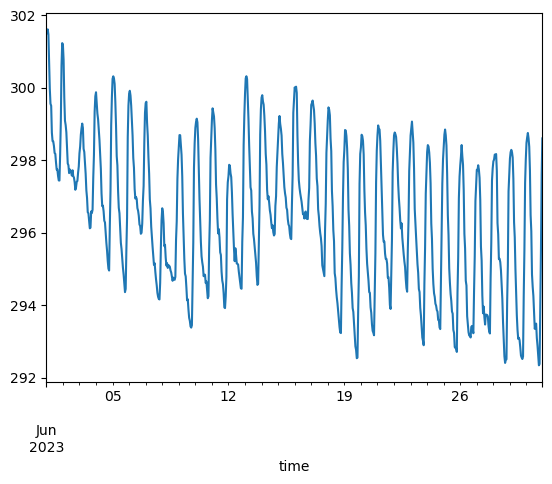

In [6]:
# plot using pandas
df['t2m'].plot()

## Part 2: Data analysis

Pandas provide a method to display statistics of the data by using .describe() method. This method will display the count, mean, standard deviation, minimum, maximum, and the quartiles of the data.

In [7]:
# display statistics of the data
df.describe()

,latitude,longitude,t2m,t2m_C
count,7.200000e+02,7.200000e+02,720.000000,720.000000
mean,-1.780000e+01,1.774167e+02,296.478775,23.328056
std,3.555183e-15,2.844147e-14,2.029997,2.030064
min,-1.780000e+01,1.774167e+02,292.337697,19.200000
25%,-1.780000e+01,1.774167e+02,294.827959,21.700000
50%,-1.780000e+01,1.774167e+02,296.509918,23.400000
75%,-1.780000e+01,1.774167e+02,298.156933,25.000000
max,-1.780000e+01,1.774167e+02,301.615832,28.500000


In [8]:
df['t2m_C'].describe(percentiles=[0.25, 0.75, 0.85, 0.95])

count    720.000000
mean      23.328056
std        2.030064
min       19.200000
25%       21.700000
50%       23.400000
75%       25.000000
85%       25.500000
95%       26.500000
max       28.500000
Name: t2m_C, dtype: float64

We can do daily aggregation to see max, min, and mean, or other statistics of the data. This can be done using the .resample() method. The method will take the frequency of the aggregation as the argument. For example, 'D' for daily, 'W' for weekly, 'M' for monthly, etc.

In [13]:
# get the daily maximum temperature
df_daily_max = df['t2m_C'].resample('D',offset='-6H').max()
df_daily_max

time
2023-05-31 18:00:00    28.5
2023-06-01 18:00:00    28.1
2023-06-02 18:00:00    25.9
2023-06-03 18:00:00    26.7
2023-06-04 18:00:00    27.2
2023-06-05 18:00:00    26.8
2023-06-06 18:00:00    26.5
2023-06-07 18:00:00    23.5
2023-06-08 18:00:00    25.5
2023-06-09 18:00:00    26.0
2023-06-10 18:00:00    26.3
2023-06-11 18:00:00    24.7
2023-06-12 18:00:00    27.2
2023-06-13 18:00:00    26.6
2023-06-14 18:00:00    26.1
2023-06-15 18:00:00    26.9
2023-06-16 18:00:00    26.5
2023-06-17 18:00:00    26.3
2023-06-18 18:00:00    25.7
2023-06-19 18:00:00    25.6
2023-06-20 18:00:00    25.8
2023-06-21 18:00:00    25.6
2023-06-22 18:00:00    25.9
2023-06-23 18:00:00    25.3
2023-06-24 18:00:00    25.7
2023-06-25 18:00:00    25.3
2023-06-26 18:00:00    24.7
2023-06-27 18:00:00    25.0
2023-06-28 18:00:00    25.1
2023-06-29 18:00:00    25.6
2023-06-30 18:00:00    25.5
Freq: D, Name: t2m_C, dtype: float64

<Axes: xlabel='time'>

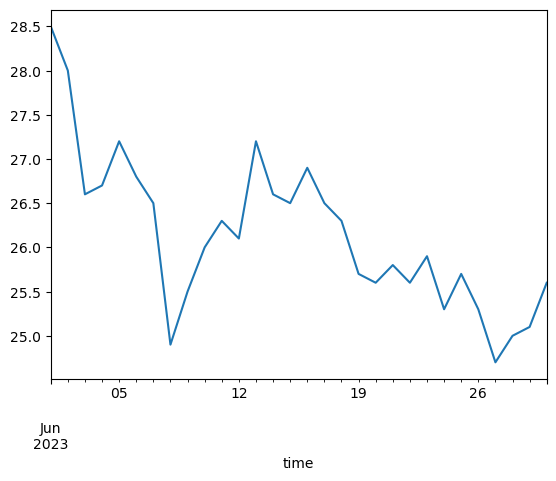

In [10]:
# plot the daily maximum temperature
df_daily_max.plot()

In [14]:
# get the daily minimum temperature
df_daily_min = df['t2m_C'].resample('D').min()

<Axes: xlabel='time'>

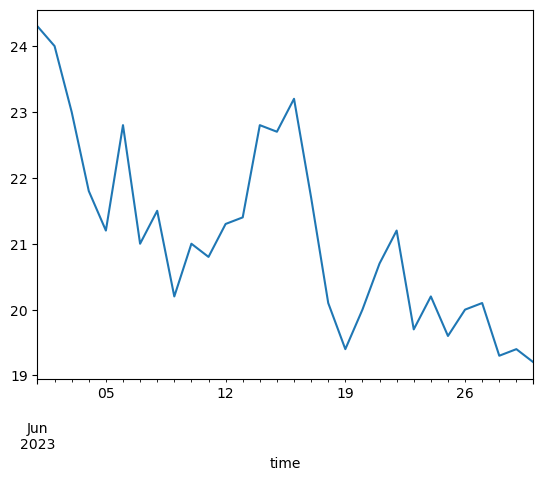

In [15]:
# plot the daily minimum temperature
df_daily_min.plot()

In [16]:
# get the daily mean temperature
df_daily_mean = df['t2m_C'].resample('D').mean()

<Axes: xlabel='time'>

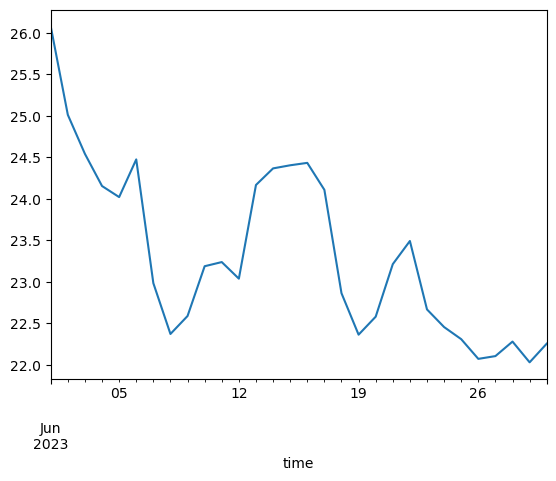

In [17]:
# plot the daily mean temperature
df_daily_mean.plot()

In [32]:
# use all aggregation
df_daily = df['t2m_C'].resample('D').agg(['min', 'max', 'mean'])
df_daily

,min,max,mean
time,,,
2023-06-01,24.3,28.5,26.079167
2023-06-02,24.0,28.0,25.012500
2023-06-03,23.0,26.6,24.541667
2023-06-04,21.8,26.7,24.154167
2023-06-05,21.2,27.2,24.020833
2023-06-06,22.8,26.8,24.475000
2023-06-07,21.0,26.5,22.983333
2023-06-08,21.5,24.9,22.370833
2023-06-09,20.2,25.5,22.587500


In [27]:
# Calculate weekly and monthly mean temperatures
weekly_mean = df['t2m_C'].resample('W').mean()
monthly_mean = df['t2m_C'].resample('M').mean()

By default, pandas resamples weekly data from Sunday to Saturday. You can adjust the resampling frequency to start from any other day of the week by changing the W-MON to another weekday. Here are the options:

    W-SUN: Sunday
    W-MON: Monday
    W-TUE: Tuesday
    W-WED: Wednesday
    W-THU: Thursday
    W-FRI: Friday
    W-SAT: Saturday

In [ ]:
df_weekly = ...

In [ ]:
df_monthly = ...

Find daily temperature range

In [37]:
df_daily['range'] = df_daily['max'] - df_daily['min']
df_daily.max()
df_daily['range'].idxmax()
df_daily['range'].min()
df_daily['range'].idxmin()

Timestamp('2023-06-08 00:00:00')

Find hourly pattern

In [39]:
# get the hourly mean temperature by using groupby
df_hourly = df['t2m_C'].groupby(df.index.day).mean()
df_hourly

time
1     26.079167
2     25.012500
3     24.541667
4     24.154167
5     24.020833
6     24.475000
7     22.983333
8     22.370833
9     22.587500
10    23.187500
11    23.237500
12    23.037500
13    24.166667
14    24.366667
15    24.404167
16    24.433333
17    24.108333
18    22.862500
19    22.362500
20    22.579167
21    23.212500
22    23.491667
23    22.666667
24    22.454167
25    22.308333
26    22.070833
27    22.104167
28    22.279167
29    22.029167
30    22.254167
Name: t2m_C, dtype: float64

Find anomaly

In [40]:
# Calculate long-term average temperature
long_term_avg = df['t2m_C'].mean()

df['anomaly'] = df['t2m_C'] - long_term_avg
df

,latitude,longitude,t2m,t2m_C,anomaly
time,,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.3,4.971944
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.4,5.071944
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.5,5.171944
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.3,4.971944
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.6,4.271944
...,...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356,19.2,-4.128056
2023-06-30 20:00:00,-17.8,177.4167,293.933152,20.8,-2.528056
2023-06-30 21:00:00,-17.8,177.4167,295.545141,22.4,-0.928056


We can also use conditional selection to label the data. For example, we want to add a new column named 'label' containing 'above' or 'below' if the value is above or below the long-term average temperature.

In [41]:
def label_temp(temp):
    if temp > long_term_avg:
        return 'above'
    else:
        return 'below'
    
df['label'] = df['t2m_C'].apply(label_temp)
df

,latitude,longitude,t2m,t2m_C,anomaly,label
time,,,,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529,28.3,4.971944,above
2023-06-01 01:00:00,-17.8,177.4167,301.570176,28.4,5.071944,above
2023-06-01 02:00:00,-17.8,177.4167,301.615832,28.5,5.171944,above
2023-06-01 03:00:00,-17.8,177.4167,301.472180,28.3,4.971944,above
2023-06-01 04:00:00,-17.8,177.4167,300.758050,27.6,4.271944,above
...,...,...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356,19.2,-4.128056,below
2023-06-30 20:00:00,-17.8,177.4167,293.933152,20.8,-2.528056,below
2023-06-30 21:00:00,-17.8,177.4167,295.545141,22.4,-0.928056,below


Find trend / smoothing data using rolling window means

In [45]:
# Smoothing data using rolling window
df_rolling = df_daily_mean.rolling(window=7).min()
df_rolling

time
2023-06-01          NaN
2023-06-02          NaN
2023-06-03          NaN
2023-06-04          NaN
2023-06-05          NaN
2023-06-06          NaN
2023-06-07    22.983333
2023-06-08    22.370833
2023-06-09    22.370833
2023-06-10    22.370833
2023-06-11    22.370833
2023-06-12    22.370833
2023-06-13    22.370833
2023-06-14    22.370833
2023-06-15    22.587500
2023-06-16    23.037500
2023-06-17    23.037500
2023-06-18    22.862500
2023-06-19    22.362500
2023-06-20    22.362500
2023-06-21    22.362500
2023-06-22    22.362500
2023-06-23    22.362500
2023-06-24    22.362500
2023-06-25    22.308333
2023-06-26    22.070833
2023-06-27    22.070833
2023-06-28    22.070833
2023-06-29    22.029167
2023-06-30    22.029167
Freq: D, Name: t2m_C, dtype: float64

## Exercise
Use sample data from another city you have extracted from the previous part. Then perform the following analysis:
1. Convert the temperature to Celsius and add it to a new column. Round the value to 2 decimal places.
2. Convert the temperature to Fahrenheit and add it to a new column. Round the value to 2 decimal places. Hint: you can use .apply method or the formula °F = (K − 273.15) × 1.8 + 32.
3. Display the statistics of the full dataset. Save it to a variable.
4. Do daily aggregation for temperature in Celsius. Calculate the minimum, maximum, mean. Save it to a variable.
5. Calculate the temperature range for daily data.
6. Do weekly aggregation for temperature in Celsius. Calculate the mean. Save it to a variable.
7. Do monthly aggregation for temperature in Celsius. Calculate the mean. Save it to a variable. Use it as reference for long term average.
8. Calculate the anomaly of the temperature data. Use the daily mean temperature dataframe.
9. Label the data as 'above' or 'below' the long term average temperature.


In [55]:
# Load the data
file_path = 'D:/Projects/fiji-training-2024/notebooks/day_06/sample_t2m_fiji.csv'
df = pd.read_csv(file_path, sep=',', parse_dates=['time'], index_col='time')

In [47]:
# Convert the temperature to Celsius and add it to a new column
df['t2m_c'] = df['t2m'] - 273.15 # You don't need to do this if it is already in Celsius

In [56]:
# Convert the temperature to Fahrenheit and add it to a new column
df['t2m_f'] = (df['t2m'] * 9 / 5) + 32 # Celsius to Fahrenheit
df

,latitude,longitude,t2m,t2m_f
time,,,,
2023-06-01 00:00:00,-17.8,177.4167,28.3,82.94
2023-06-01 01:00:00,-17.8,177.4167,28.4,83.12
2023-06-01 02:00:00,-17.8,177.4167,28.5,83.30
2023-06-01 03:00:00,-17.8,177.4167,28.3,82.94
2023-06-01 04:00:00,-17.8,177.4167,27.6,81.68
...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,19.2,66.56
2023-06-30 20:00:00,-17.8,177.4167,20.8,69.44
2023-06-30 21:00:00,-17.8,177.4167,22.4,72.32


In [57]:
# Display the statistics of the full dataset
stats = df.describe()
stats

,latitude,longitude,t2m,t2m_f
count,7.200000e+02,7.200000e+02,720.000000,720.000000
mean,-1.780000e+01,1.774167e+02,23.328056,73.990500
std,3.555183e-15,2.844147e-14,2.030064,3.654115
min,-1.780000e+01,1.774167e+02,19.200000,66.560000
25%,-1.780000e+01,1.774167e+02,21.700000,71.060000
50%,-1.780000e+01,1.774167e+02,23.400000,74.120000
75%,-1.780000e+01,1.774167e+02,25.000000,77.000000
max,-1.780000e+01,1.774167e+02,28.500000,83.300000


In [59]:
# Do daily aggregation for temperature in Celsius
df_daily = df['t2m'].resample('D').agg(['min', 'max', 'mean'])
df_daily

,min,max,mean
time,,,
2023-06-01,24.3,28.5,26.079167
2023-06-02,24.0,28.0,25.012500
2023-06-03,23.0,26.6,24.541667
2023-06-04,21.8,26.7,24.154167
2023-06-05,21.2,27.2,24.020833
2023-06-06,22.8,26.8,24.475000
2023-06-07,21.0,26.5,22.983333
2023-06-08,21.5,24.9,22.370833
2023-06-09,20.2,25.5,22.587500


In [64]:
# Calculate the temperature range for daily data
df_daily['range'] = df_daily['max'] - df_daily['min']
df_daily

,min,max,mean,range
time,,,,
2023-06-01,24.3,28.5,26.079167,4.2
2023-06-02,24.0,28.0,25.012500,4.0
2023-06-03,23.0,26.6,24.541667,3.6
2023-06-04,21.8,26.7,24.154167,4.9
2023-06-05,21.2,27.2,24.020833,6.0
2023-06-06,22.8,26.8,24.475000,4.0
2023-06-07,21.0,26.5,22.983333,5.5
2023-06-08,21.5,24.9,22.370833,3.4
2023-06-09,20.2,25.5,22.587500,5.3


In [61]:
# Do weekly aggregation for temperature in Celsius
weekly_mean = df['t2m'].resample('W').agg(['min', 'max', 'mean'])
weekly_mean

,min,max,mean
time,,,
2023-06-04,21.8,28.5,24.946875
2023-06-11,20.2,27.2,23.266071
2023-06-18,20.1,27.2,23.911310
2023-06-25,19.4,25.9,22.725000
2023-07-02,19.2,25.6,22.147500


In [62]:
# Do monthly aggregation for temperature in Celsius
monthly_mean = df['t2m'].resample('M').agg(['min', 'max', 'mean'])

In [65]:
# Calculate the anomaly of the temperature data
long_term_avg = df['t2m'].mean()
df['anomaly'] = df['t2m'] - long_term_avg
df

,latitude,longitude,t2m,t2m_f,anomaly
time,,,,,
2023-06-01 00:00:00,-17.8,177.4167,28.3,82.94,4.971944
2023-06-01 01:00:00,-17.8,177.4167,28.4,83.12,5.071944
2023-06-01 02:00:00,-17.8,177.4167,28.5,83.30,5.171944
2023-06-01 03:00:00,-17.8,177.4167,28.3,82.94,4.971944
2023-06-01 04:00:00,-17.8,177.4167,27.6,81.68,4.271944
...,...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,19.2,66.56,-4.128056
2023-06-30 20:00:00,-17.8,177.4167,20.8,69.44,-2.528056
2023-06-30 21:00:00,-17.8,177.4167,22.4,72.32,-0.928056


In [67]:
# Label the data as 'above' or 'below' the long term average temperature
def label_temp(temp):
    if temp > long_term_avg:
        return 'above'
    else:
        return 'below'

df['label'] = df['t2m'].apply(label_temp)
df

,latitude,longitude,t2m,t2m_f,anomaly,label
time,,,,,,
2023-06-01 00:00:00,-17.8,177.4167,28.3,82.94,4.971944,above
2023-06-01 01:00:00,-17.8,177.4167,28.4,83.12,5.071944,above
2023-06-01 02:00:00,-17.8,177.4167,28.5,83.30,5.171944,above
2023-06-01 03:00:00,-17.8,177.4167,28.3,82.94,4.971944,above
2023-06-01 04:00:00,-17.8,177.4167,27.6,81.68,4.271944,above
...,...,...,...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,19.2,66.56,-4.128056,below
2023-06-30 20:00:00,-17.8,177.4167,20.8,69.44,-2.528056,below
2023-06-30 21:00:00,-17.8,177.4167,22.4,72.32,-0.928056,below


In [ ]:
# Save all the results to a new file
output_file = '...'
df.to_csv(...)
df_daily.to_csv(...)
weekly_mean.to_csv(...)
monthly_mean.to_csv(...)

# Some Inspiration
With observation data you have for the Nausori station, do separate analysis from the previous exercise. You can try to do comparison between reanalysis data and real observation data. After, you can do analysis for the bias between the reanalysis data and the observation, and maybe derive some correction factor for the reanalysis data.